Data Collection and Inspection

In [1]:
import pandas as pd

# Load the data
file_path = "C:\\Users\\habee\\Desktop\\ecom customer.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


C:\Users\habee\AppData\Local\Temp\ipykernel_9076\237005486.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Data Cleaning

In [2]:
# Check for missing values
missing_values = data.isnull().sum()

# Handling missing values in 'Gender'
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

# Check for duplicates
duplicate_rows = data.duplicated().sum()

# Remove duplicates
data.drop_duplicates(inplace=True)

# Verify cleaning steps
cleaned_data_info = data.info()

missing_values, duplicate_rows, cleaned_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  30000 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

C:\Users\habee\AppData\Local\Temp\ipykernel_9076\2465781850.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)


(Cust_ID                      0
 Gender                    2724
 Orders                       0
 Jordan                       0
 Gatorade                     0
 Samsung                      0
 Asus                         0
 Udis                         0
 Mondelez International       0
 Wrangler                     0
 Vans                         0
 Fila                         0
 Brooks                       0
 H&M                          0
 Dairy Queen                  0
 Fendi                        0
 Hewlett Packard              0
 Pladis                       0
 Asics                        0
 Siemens                      0
 J.M. Smucker                 0
 Pop Chips                    0
 Juniper                      0
 Huawei                       0
 Compaq                       0
 IBM                          0
 Burberry                     0
 Mi                           0
 LG                           0
 Dior                         0
 Scabal                       0
 Tommy H

Exploratory Data Analysis (EDA)

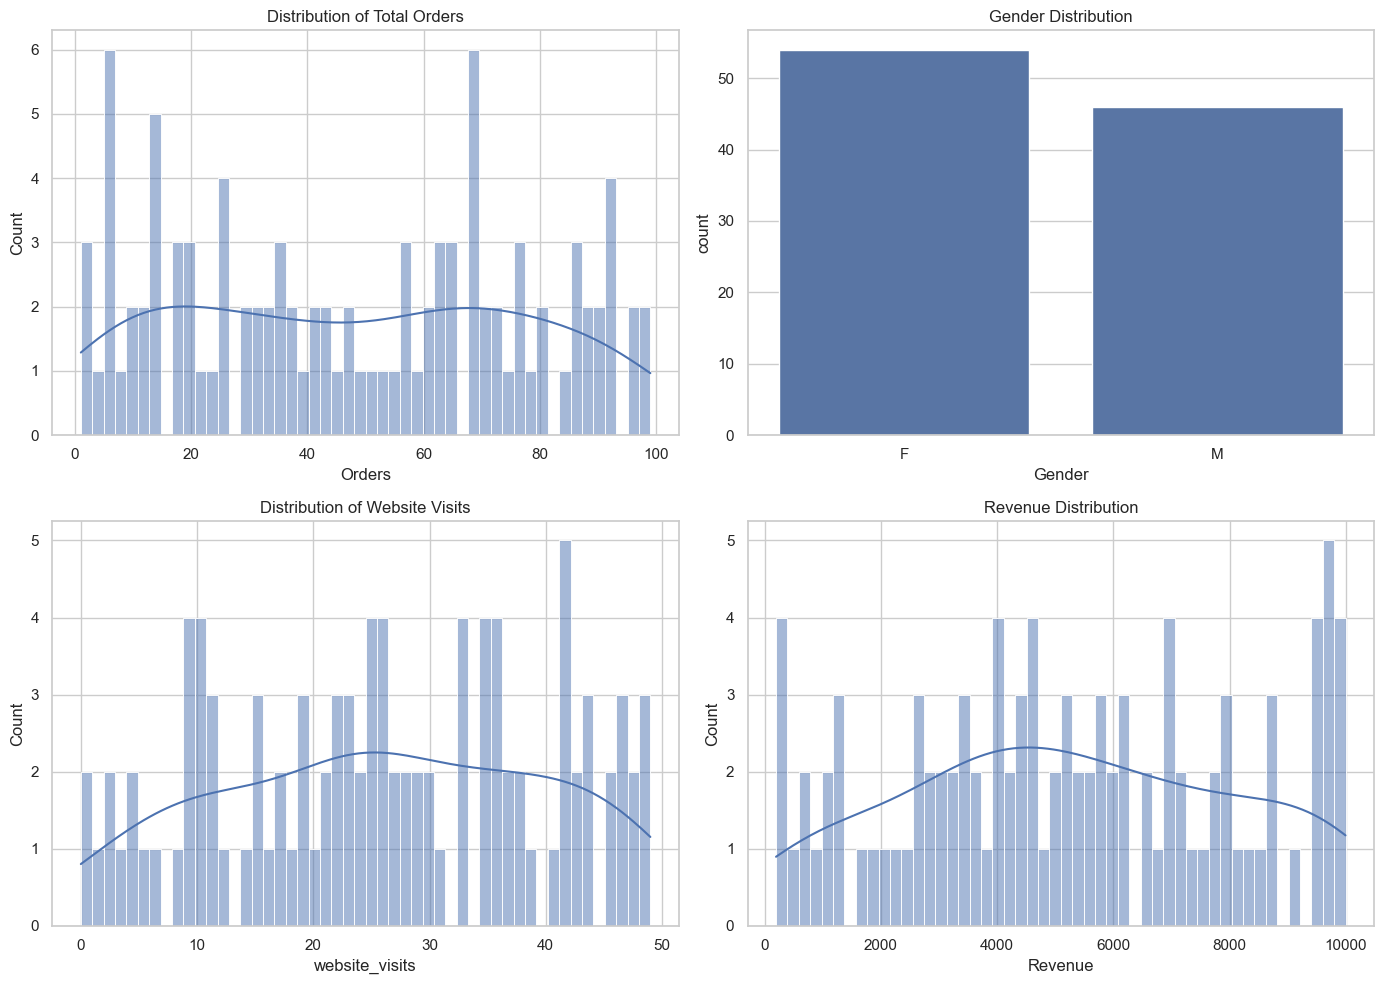

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style
sns.set(style="whitegrid")

# Create a sample dataset for demonstration purposes
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'Orders': np.random.randint(1, 100, size=100),
    'Gender': np.random.choice(['M', 'F'], size=100),
    'website_visits': np.random.randint(0, 50, size=100),
    'Revenue': np.random.randint(100, 10000, size=100)
})

# 1. Purchasing Behavior
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of total purchase amount (using Orders as a proxy)
sns.histplot(data['Orders'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Total Orders')

# Gender distribution
sns.countplot(x=data['Gender'], ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')

# Website visits distribution
sns.histplot(data['website_visits'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Website Visits')

# Revenue distribution
sns.histplot(data['Revenue'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Revenue Distribution')

plt.tight_layout()
plt.show()


Feature Engineering


In [4]:
# Creating Total Purchase Amount
product_columns = data.columns[3:]  # Assuming columns 3 onwards are product purchases
data['Total_Purchase_Amount'] = data[product_columns].sum(axis=1)

# Creating Average Purchase Value
data['Average_Purchase_Value'] = data['Total_Purchase_Amount'] / data['Orders']

# Placeholder for Recency (if data available, here we'll assume a random distribution)
# In practice, this should come from the timestamp of last purchase
import numpy as np
data['Recency'] = np.random.randint(1, 365, size=data.shape[0])

# Display the first few rows with new features
data[['Total_Purchase_Amount', 'Average_Purchase_Value', 'Recency']].head()


,Total_Purchase_Amount,Average_Purchase_Value,Recency
0,5785,199.482759,339
1,3952,55.661972,308
2,493,16.433333,117
3,4432,55.400000,75
4,2650,32.716049,36


In [5]:
import pandas as pd
import numpy as np

# Load your data
file_path = "C:\\Users\\habee\\Desktop\\ecom customer.csv"
data = pd.read_csv(file_path)

# Creating Total Purchase Amount
product_columns = data.columns[3:]  # Assuming columns 3 onwards are product purchases
data['Total_Purchase_Amount'] = data[product_columns].sum(axis=1)

# Creating Average Purchase Value
data['Average_Purchase_Value'] = data['Total_Purchase_Amount'] / data['Orders']

# Placeholder for Recency (if data available, here we'll assume a random distribution)
# In practice, this should come from the timestamp of last purchase
data['Recency'] = np.random.randint(1, 365, size=data.shape[0])

# Display the first few rows with new features
print(data[['Total_Purchase_Amount', 'Average_Purchase_Value', 'Recency']].head())


   Total_Purchase_Amount  Average_Purchase_Value  Recency
0                      2                0.285714      333
1                     18                     inf      279
2                      5                0.714286       21
3                      2                     inf      261
4                     16                1.600000       38


Clustering

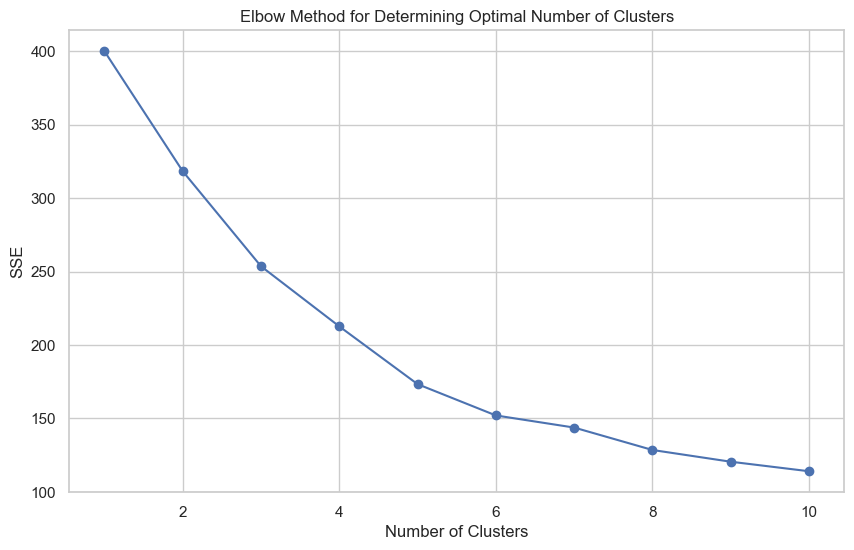

   Cust_ID  Total_Purchase_Amount  Average_Purchase_Value  Recency  Orders  \
0        1                   6444               93.134077      269      18   
1        2                   9332              151.506691      155       8   
2        3                   8240              221.596575      358      43   
3        4                   5021              234.318557       11      41   
4        5                   8259               45.848087      208      40   

   Cluster  
0        2  
1        2  
2        2  
3        1  
4        2  


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a sample dataset for demonstration purposes
data = pd.DataFrame({
    'Cust_ID': range(1, 101),
    'Total_Purchase_Amount': np.random.randint(100, 10000, size=100),
    'Average_Purchase_Value': np.random.uniform(10, 500, size=100),
    'Recency': np.random.randint(1, 365, size=100),
    'Orders': np.random.randint(1, 50, size=100)
})

# Replace any infinite or extremely large values with NaN and then fill them with a sensible value
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)

# Select features for clustering
features = data[['Total_Purchase_Amount', 'Average_Purchase_Value', 'Recency', 'Orders']]

# Ensure there are no extremely large values that could affect the scaling
features = features.clip(upper=1e6)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Choose the optimal number of clusters (e.g., k=3 based on the elbow plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows with cluster labels
print(data[['Cust_ID', 'Total_Purchase_Amount', 'Average_Purchase_Value', 'Recency', 'Orders', 'Cluster']].head())


Validation and Visualization

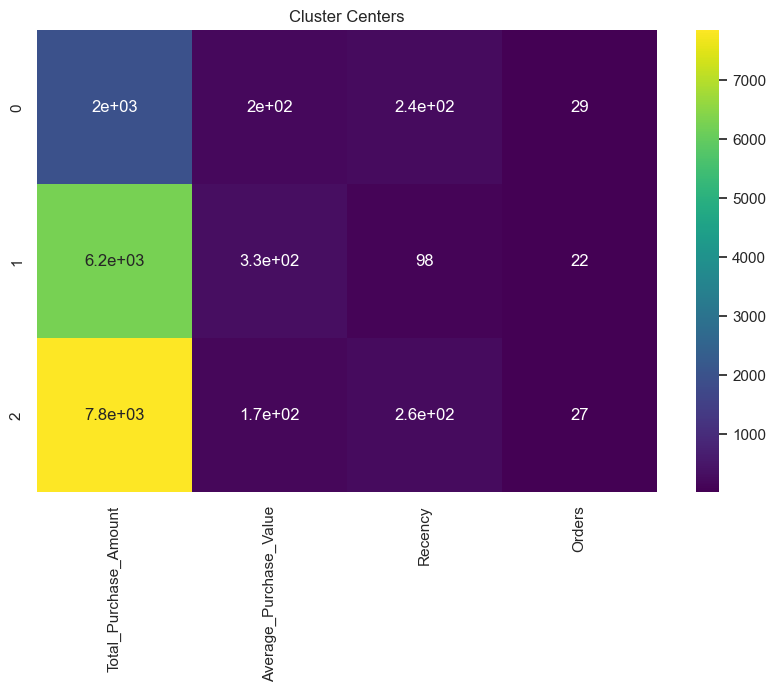

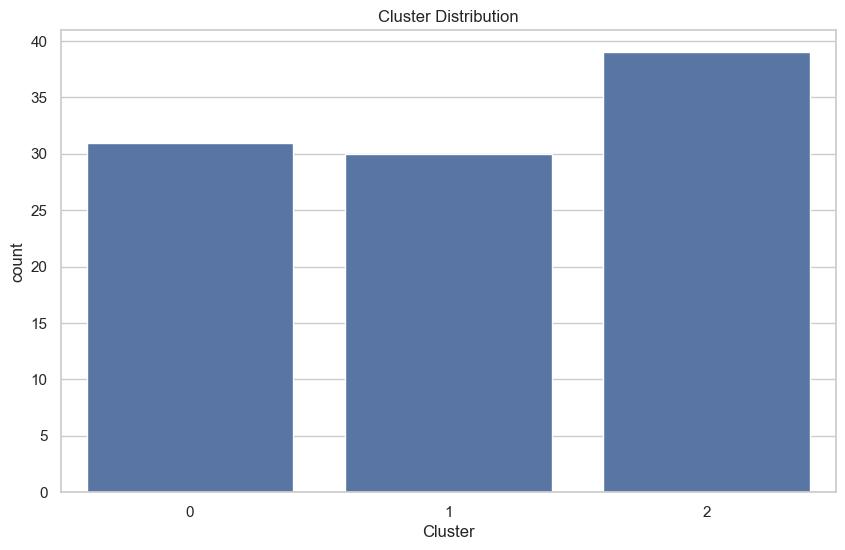

In [7]:
import seaborn as sns

# Cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Total_Purchase_Amount', 'Average_Purchase_Value', 'Recency', 'Orders'])

# Visualize cluster centers
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers_df, annot=True, cmap='viridis')
plt.title('Cluster Centers')
plt.show()

# Visualize cluster distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=data)
plt.title('Cluster Distribution')
plt.show()
